Assignment: Evaluate an AB test of the recommendation algorithm

Introduction 

Bambino is a successful e-shop selling toys in two countries: Chille and the New Eldorado. In both countries, Bambino strives to sell as many products as possible, to increase the average size of an order and to maximize the revenue earned.

For this purpose, Bambino has developed a recommendation algorithm that proposes to clients additional products they may like. Once the algorithm was developed, Bambino has decided to run an AB test that would show what additional value the algorithm brings. The AB test was run from 17.5.2023 to 16.6.2023 and was conducted as follows. 

Each visitor coming to a Bambino website was assigned a group (an “AB group”) on her first visit. The group was either 1 or 2, each assigned with 50% probability (theoretically). The test was set up so that the group was retained in the visitor’s next visits. The visitors in group 1 were shown the recommendations, while the visitors in group 2 were not shown any of them. From now on, we shall refer to group 1 as “reco group” and to group 2 as “control group”.

Now that the test is over, Bambino wishes to evaluate the results. There are some complicating factors in this.
First, Bambino’s IT is not the best on the planet. Sometimes, no AB group is assigned to a web visitor at all. Bambino does not know how often this happens. There is also some suspicion that the probability with which the groups 1 and 2 are assigned is not precisely 50:50. 

Second, Bambino tracks its web visitors using the Google analytics (GA) tool. Sometimes — for an unknown reason — an order is not tracked at all. In this case, Bambino receives the order just fine, but it does not know which AB group the order originated from. 

Data structure

You have a sample of the relevant Bambino data from the test period. The data consists of two tables:

Table clients_final:

This table tracks all sessions (visits) to the Bambino website during the test period. Each line is one such a visit. The data comes from GA.

•	date – date of each session in YYYY-MM-DD format. Date spans the period 17.5.2023 to 16.6.2023.

•	country – Chille (CH) or the New Eldorado (NE)

•	sessionID – ID of a session (a visit). SessionID per se is not a unique identifier, it can repeat across different users and/or days. It is unique within one day and in a combination with the clientID. One user can have multiple visits, both on the same day and on different days.

•	clientID – ID of a visitor. You may assume that sessions with the same clientID belong to the same visitor.

•	IsNew - equals 1 if the session is the first session of a particular visitor. Otherwise it equals 0.

•	abUser – AB group. Contains values 1, 2 and — in rare circumstances — 99. 99 means that the group was, by a mistake, unassigned. 

•	orderNumber – ID number of a particular order. If no order was concluded within the particular session, the column is empty.

Table orders_final:

This table summarizes the orders Bambino received during the test period. Each line corresponds to one order. The table comes directly from the Bambino’s accounting system.

•	country - Chille (CH) or the New Eldorado (NE)

•	date - date when the given order was received. Again in a YYYY-MM-DD format.

•	orderNumber – ID number of a particular order. Corresponds to the same column in the previous table.  

•	quantity – number of products in the order

•	revenue – total revenue in EUR earned in the order, i.e. the sum of products’ prices. It should be positive or zero.

Task

You were asked to evaluate the AB test per each country. In particular, you should answer the following questions:

•	Is the ratio of users in the reco group and users in the test group really 50:50? Can you test it by an appropriate statistical test? Do you prefer to test it on a daily basis, or to run one test for the whole period? If you run multiple tests, do you need all of them to have positive results to verify the 50:50 distribution hypothesis? 

•	What about the users with an unassigned group? Bambino thinks the test is fine if their share is below 0.5%. 

•	Do you find any other problems related to a group assignment in the data?

•	What about the orders that are not in GA data? What is their share? How do you propose to handle them?

•	Does the “reco group” earn, on average, a greater revenue? Does it have larger orders? Propose appropriate metrics and visualize them. Is there any other metric you may wish to evaluate?

•	Do you observe any differences between both countries?

•	Optional assignment:

o	Obviously, the users (a their orders) in an unassigned group cast some doubts on the evaluation of the test. If their share is high, the evaluation may be quite unreliable. Can you construct some kind of a confidence-like interval for the above metrics that would show how (un)certain your results are?

o	The expected difference between the reco group and the test group is in the order of magnitude of 1%. If a particularly large order arrives in some group, it can skew the results in favour of this group. Propose a solution to this problem.

Method

You may analyze the data by any tool that you know, but we highly recommend Python. We expect you to submit us both the code (with appropriate comments) and a short presentation of the results. We also expect to see some visualizations in any tool of your preference (Excel, Tableau, PowerBI, Matplotlib, etc.)
We wish you a good luck and hope you enjoy the assignment!!!!

# Import the data

In [1]:
import pandas as pd

clients = pd.read_csv('clients_final.csv')
clients.head(10)

,date,country,sessionID,clientID,isNew,abUser,orderNumber
0,2023-05-17,CH,4917af16af33f.smyluydm,47f9978883.4917aff,0,1.0,NaN
1,2023-05-17,CH,4917af16aff17.xgrloruz,913x1x688.497f486,0,1.0,NaN
2,2023-05-17,CH,4917af166a373.j1v9mmi,491a661ax6.4917aff,1,1.0,NaN
3,2023-05-17,CH,4917af1669x74.vsakfcn,4ff8714149.4917af9,1,1.0,NaN
4,2023-05-17,CH,4917af1661f1a.fxp7nsf,67a67x3f9.4917af18,1,1.0,NaN
5,2023-05-17,CH,4917af167467f.x1zpyxfg,48ff77fx11.4917a9,0,2.0,NaN
6,2023-05-17,CH,4917af16f4a98.lc1b8yn,48171ffx88.4917aff,1,2.0,NaN
7,2023-05-17,CH,4917af16fa473.nhnc8xf7,41fx9x4fxf.4917af9,1,2.0,NaN
8,2023-05-17,CH,4917af16fx34x.n6c6bdy,4f17a76x4f.4917af9,0,2.0,1.142808e+09
9,2023-05-17,CH,4917af173849a.kwnaoqn,49f7a3944f.4917aff,1,2.0,NaN


In [2]:
orders = pd.read_csv('orders_final.csv')
orders.head(10)

,country,date,orderNumber,quantity,revenue
0,CH,2023-06-06,1142994400,1,4.5662
1,CH,2023-06-12,1143049344,16,188.7852
2,CH,2023-06-01,1142951314,6,68.3429
3,CH,2023-06-12,1143046214,12,56.6637
4,CH,2023-06-08,1143012064,7,22.0151
5,NE,2023-05-23,247847466,1,43.1400
6,CH,2023-05-25,1142880912,5,57.7869
7,CH,2023-05-24,1142867363,6,141.2334
8,NE,2023-05-22,247845262,5,64.0500
9,CH,2023-06-15,1143089480,1,40.7431


In [3]:
clients.describe()

,isNew,abUser,orderNumber
count,5.562172e+06,5.539734e+06,2.722670e+05
mean,3.676220e-01,1.500048e+00,9.852492e+08
std,4.821578e-01,5.000000e-01,3.400302e+08
min,0.000000e+00,1.000000e+00,2.478384e+08
25%,0.000000e+00,1.000000e+00,1.142831e+09
50%,0.000000e+00,2.000000e+00,1.142920e+09
75%,1.000000e+00,2.000000e+00,1.143010e+09
max,1.000000e+00,2.000000e+00,1.143098e+09


In [4]:
print(len(clients['sessionID']))
print(len(clients['clientID']))
print(len(clients['country']))
print(len(clients['date']))
print(len(clients['isNew']))

5562172
5562172
5562172
5562172
5562172


In [5]:
print(len(clients['orderNumber'].unique()))
print(len(orders['orderNumber'].unique()))

print(f"Gap between orderNumber in both tables {100 - round((len(orders['orderNumber'].unique())/len(clients['orderNumber'].unique())), 3)*100} %")

272263
253340
Gap between orderNumber in both tables 7.0 %


In [6]:
print("Length unique 'clientID': ", len(clients['clientID'].unique()))


missing_group_users = clients[clients['abUser'].isnull()]['clientID'].nunique()

print(f"Number of users without an assigned A/B test group: {missing_group_users}")

print(f"Percenteg of not-assigned users: {round((missing_group_users / len(clients['clientID'].unique()))*100, 3)} %")

Length unique 'clientID':  2530711
Number of users without an assigned A/B test group: 14831
Percenteg of not-assigned users: 0.586 %


0.586 % is a little higher than required 0.5%, but still not significant. We will just delite users without assigned group

In [7]:
clients.dropna(subset=['abUser'], inplace=True)

In [8]:
orders.describe()

,orderNumber,quantity,revenue
count,2.533400e+05,253340.000000,2.533400e+05
mean,9.786685e+08,4.390069,5.384274e+01
std,3.464969e+08,3.793880,5.960387e+03
min,2.478384e+08,1.000000,-4.320000e-02
25%,1.142830e+09,2.000000,1.603720e+01
50%,1.142919e+09,3.000000,3.013450e+01
75%,1.143011e+09,6.000000,5.447857e+01
max,1.143098e+09,162.000000,3.000000e+06


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253340 entries, 0 to 253339
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      253340 non-null  object 
 1   date         253340 non-null  object 
 2   orderNumber  253340 non-null  int64  
 3   quantity     253340 non-null  int64  
 4   revenue      253340 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 9.7+ MB


min and max revenue are suspicious. We should to delete them

# Data Cleaning and Understanding The Data

In [10]:
max_index = orders['revenue'].idxmax()
orders.iloc[max_index]

country                NE
date           2023-06-01
orderNumber     247862180
quantity                2
revenue         3000000.0
Name: 191623, dtype: object

In [11]:
min_index = orders['revenue'].idxmin()
orders.iloc[min_index]

country                CH
date           2023-06-07
orderNumber    1143000908
quantity                4
revenue           -0.0432
Name: 48230, dtype: object

orderNumber on 3*10^6 is 247862180

In [12]:
orders.drop(index=max_index, inplace=True)
orders.drop(index=min_index, inplace=True)
clients.drop(index=clients[clients['orderNumber'] == 247862180].index, inplace=True)
clients.drop(index=clients[clients['orderNumber'] == 1143000908].index, inplace=True)

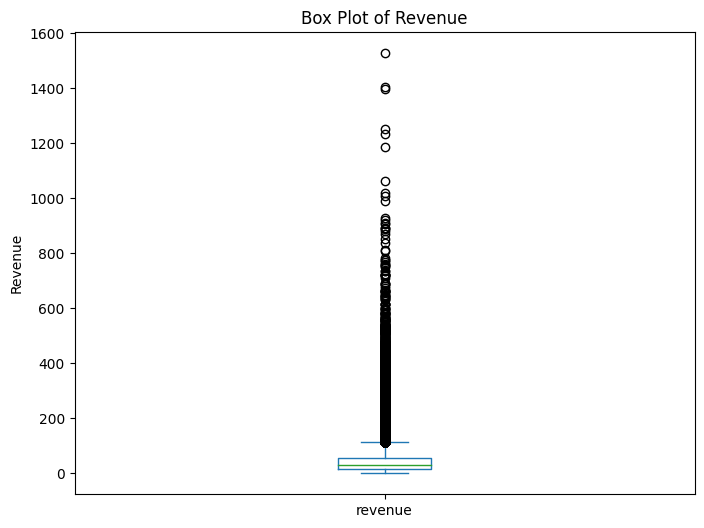

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

ax = orders['revenue'].plot.box()

ax.set_ylabel('Revenue')
ax.set_title('Box Plot of Revenue')

# Show the plot
plt.show()

In [14]:
max_index = orders['quantity'].idxmax()
orders.iloc[max_index]

country                CH
date           2023-05-24
orderNumber    1142872917
quantity                1
revenue           11.4663
Name: 67095, dtype: object

orderNumber on 162 pieces is 1142999126

In [15]:
orders.drop(index=max_index, inplace=True)
clients.drop(index=clients[clients['orderNumber'] == 1142999126].index, inplace=True)

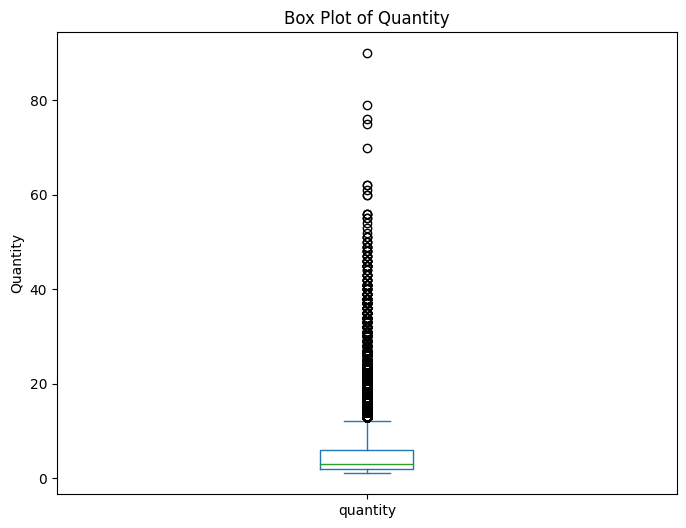

In [16]:
plt.figure(figsize=(8, 6))

ax = orders['quantity'].plot.box()

ax.set_ylabel('Quantity')
ax.set_title('Box Plot of Quantity')

plt.show()

I remove the most evident outliers to analyze the average scenario. If a specific individual has purchased 162 items or has spent 1500 euros, it doesn't provide us with substantial insights regarding the model's accuracy, as it is more plausible that such behavior occurred at the start of their session.

In [17]:
orders.describe()

,orderNumber,quantity,revenue
count,2.533370e+05,253337.000000,253337.000000
mean,9.786701e+08,4.389458,41.999499
std,3.464956e+08,3.780955,42.709098
min,2.478384e+08,1.000000,-0.042300
25%,1.142830e+09,2.000000,16.037200
50%,1.142919e+09,3.000000,30.134500
75%,1.143011e+09,6.000000,54.477100
max,1.143098e+09,90.000000,1527.955000


In [18]:
orders['revenue'].median()

30.1345

In [19]:
orders['quantity'].median()

3.0

In [20]:
len(orders[orders['revenue'] >= 200])

2386

In [21]:
orders.drop(orders[orders['revenue'] >= 200].index, inplace=True)
orders.drop(orders[orders['revenue'] < 0].index, inplace=True)

In [22]:
orders.describe()

,orderNumber,quantity,revenue
count,2.509320e+05,250932.000000,250932.000000
mean,9.784225e+08,4.318560,39.579595
std,3.466978e+08,3.626895,32.685083
min,2.478384e+08,1.000000,0.000000
25%,1.142830e+09,2.000000,15.927700
50%,1.142919e+09,3.000000,29.798750
75%,1.143011e+09,6.000000,53.556400
max,1.143098e+09,62.000000,199.933800


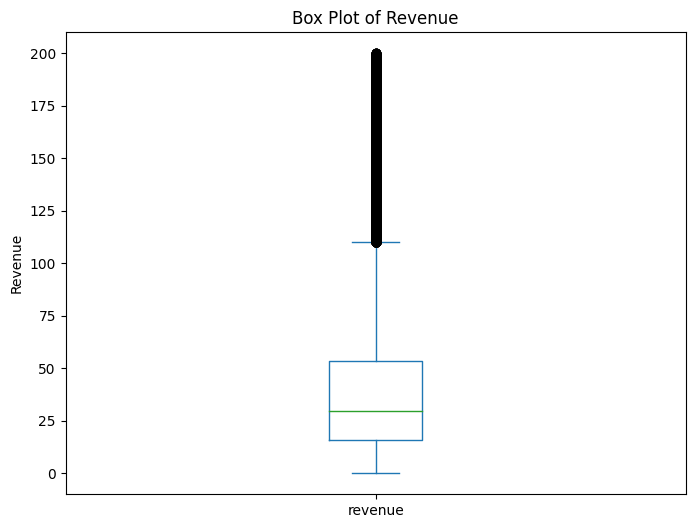

In [23]:
plt.figure(figsize=(8, 6))

ax = orders['revenue'].plot.box()

ax.set_ylabel('Revenue')
ax.set_title('Box Plot of Revenue')

# Show the plot
plt.show()

In [24]:
orders.drop(orders[orders['quantity'] >= 20].index, inplace=True)

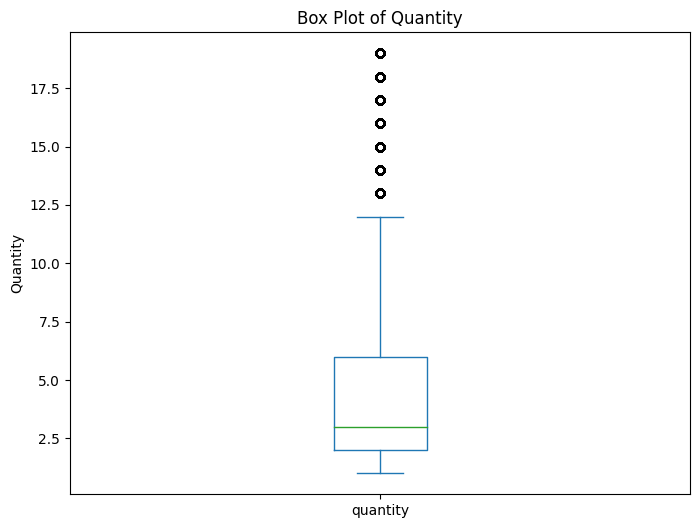

In [25]:
plt.figure(figsize=(8, 6))

ax = orders['quantity'].plot.box()

ax.set_ylabel('Quantity')
ax.set_title('Box Plot of Quantity')

plt.show()

In [26]:
orders.describe()

,orderNumber,quantity,revenue
count,2.493780e+05,249378.000000,249378.000000
mean,9.779427e+08,4.192022,39.215366
std,3.470888e+08,3.231035,32.267481
min,2.478384e+08,1.000000,0.000000
25%,1.142830e+09,2.000000,15.860000
50%,1.142919e+09,3.000000,29.617900
75%,1.143010e+09,6.000000,53.185900
max,1.143098e+09,19.000000,199.933800


Text(0.5, 0.98, '')

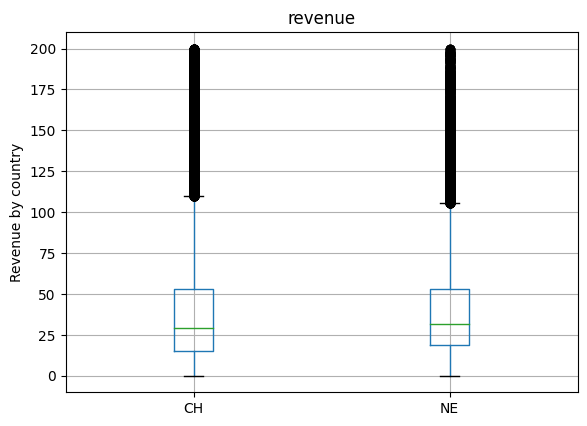

In [27]:
ax = orders.boxplot(by='country', column='revenue')
ax.set_xlabel('')
ax.set_ylabel('Revenue by country')
plt.suptitle('')

In [28]:
print(orders[orders['country']=='CH']['revenue'].mean())
print(orders[orders['country']=='NE']['revenue'].mean())

print(orders[orders['country']=='CH']['revenue'].median())
print(orders[orders['country']=='NE']['revenue'].median())

38.97324202844571
40.28662836930372
28.9975
31.9


Text(0.5, 0.98, '')

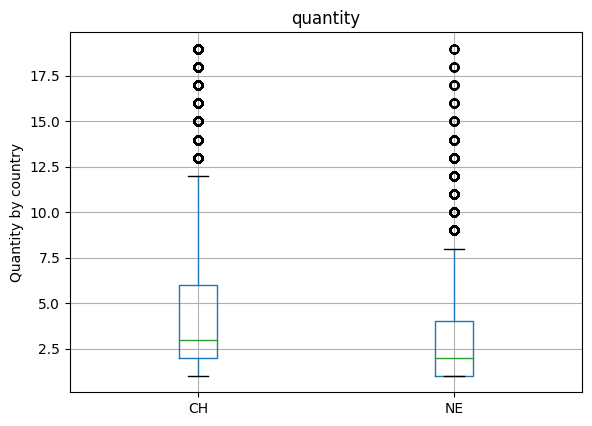

In [29]:
ax = orders.boxplot(by='country', column='quantity')
ax.set_xlabel('')
ax.set_ylabel('Quantity by country')
plt.suptitle('')

In [30]:
print(orders[orders['country']=='CH']['quantity'].mean())
print(orders[orders['country']=='NE']['quantity'].mean())

print(orders[orders['country']=='CH']['quantity'].median())
print(orders[orders['country']=='NE']['quantity'].median())

4.385703399621445
3.335087986426816
3.0
2.0


In [31]:
revenue_ch_sum = orders[orders['country'] == 'CH']['revenue'].sum()
revenue_ne_sum = orders[orders['country'] == 'NE']['revenue'].sum()

print('Revenue in CH = ', revenue_ch_sum)
print('Revenue in NE = ', revenue_ne_sum)

print(f'Revenue in CH more than NE in {revenue_ch_sum/revenue_ne_sum} times' )

Revenue in CH =  7927352.294796
Revenue in NE =  1852097.166022
Revenue in CH more than NE in 4.280203242156376 times


Text(0.5, 0, 'Revenue in CH')

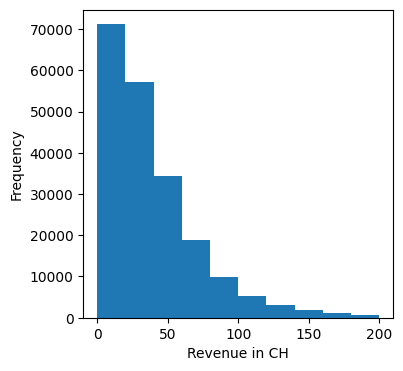

In [32]:
ax = (orders[orders['country']=='CH']['revenue']).plot.hist(figsize=(4, 4))
ax.set_xlabel('Revenue in CH')

Text(0.5, 0, 'Revenue in NE')

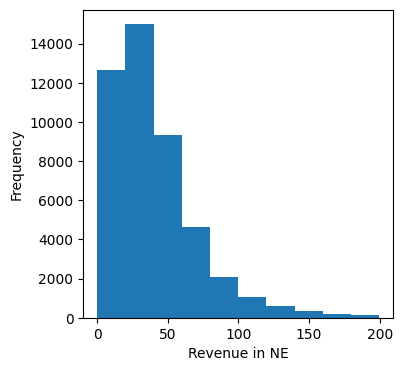

In [33]:
ax = (orders[orders['country']=='NE']['revenue']).plot.hist(figsize=(4, 4))
ax.set_xlabel('Revenue in NE')

Text(0.5, 0, 'Revenue')

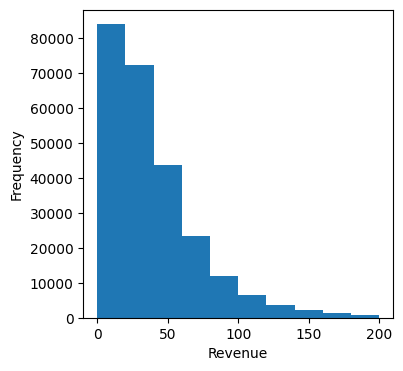

In [34]:
ax = (orders['revenue']).plot.hist(figsize=(4, 4))
ax.set_xlabel('Revenue')

Text(0.5, 0, 'Quantity')

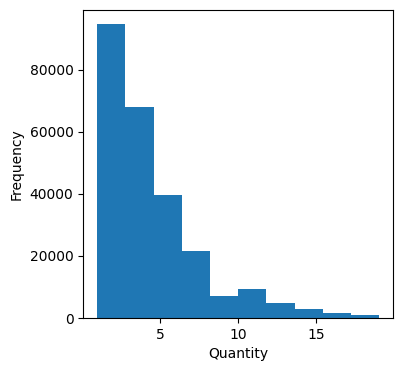

In [35]:
ax = (orders['quantity']).plot.hist(figsize=(4, 4))
ax.set_xlabel('Quantity')

In [36]:
len(clients)

5539733

In [37]:
clients.drop(clients[clients['abUser'].isna()].index, inplace=True)

In [38]:
len(clients)

5539733

In [39]:
print('Quantity of the 1 group', len(clients[clients['abUser'] == 1.0]))
print('Quantity of the 2 group', len(clients[clients['abUser'] == 2.0]))

print(f"Percentege: {(len(clients[clients['abUser'] == 1.0])/len(clients[clients['abUser']== 2.0]))*100} %")

Quantity of the 1 group 2769599
Quantity of the 2 group 2770134
Percentege: 99.98068685485973 %


It is almost 50:50, I wouldnt solve it at all

In [40]:
orders.columns

Index(['country', 'date', 'orderNumber', 'quantity', 'revenue'], dtype='object')

In [41]:
merged_dataframe = pd.merge(clients, orders, how='outer', on='orderNumber')
merged_dataframe.describe()

,isNew,abUser,orderNumber,quantity,revenue
count,5.539733e+06,5.539733e+06,2.761670e+05,249378.000000,249378.000000
mean,3.672794e-01,1.500048e+00,9.876255e+08,4.192022,39.215366
std,4.820636e-01,5.000000e-01,3.380043e+08,3.231035,32.267481
min,0.000000e+00,1.000000e+00,2.478384e+08,1.000000,0.000000
25%,0.000000e+00,1.000000e+00,1.142832e+09,2.000000,15.860000
50%,0.000000e+00,2.000000e+00,1.142921e+09,3.000000,29.617900
75%,1.000000e+00,2.000000e+00,1.143011e+09,6.000000,53.185900
max,1.000000e+00,2.000000e+00,1.143098e+09,19.000000,199.933800


In [42]:
merged_dataframe.columns

Index(['date_x', 'country_x', 'sessionID', 'clientID', 'isNew', 'abUser',
       'orderNumber', 'country_y', 'date_y', 'quantity', 'revenue'],
      dtype='object')

In [43]:
columns_to_drop = ['country_y', 'date_y']
merged_dataframe.drop(columns_to_drop, inplace=True, axis=1)

In [44]:
merged_dataframe.dropna(subset=['date_x', 'country_x', 'sessionID', 'clientID', 'abUser'], inplace=True)
merged_dataframe.tail(10)

,date_x,country_x,sessionID,clientID,isNew,abUser,orderNumber,quantity,revenue
5539723,2023-06-16,CH,4919f3381f173.dxj6fo4s,a73793116.4919f,1.0,1.0,1.000180e+09,NaN,NaN
5539724,2023-06-16,CH,49191f7ffa8xf.d4afyxwm,18x71f6f7.49191f6,1.0,2.0,1.143091e+09,1.0,6.4214
5539725,2023-06-16,CH,49191f83a4981.f3397ll,43f4ff3a97.49xf61x,0.0,1.0,1.143091e+09,3.0,28.9837
5539726,2023-06-16,CH,49191f837a97f.6rihdf71,4f49f9f8a3.49191f6,1.0,1.0,1.143091e+09,6.0,33.9851
5539727,2023-06-16,CH,4919f39aff388.4hmztjaw,41xx989971.4988976,0.0,1.0,1.143093e+09,5.0,66.2285
5539728,2023-06-16,CH,4919f39639f79.awey9w88,8x4x9974f.491997a,0.0,2.0,1.143093e+09,2.0,98.4396
5539729,2023-06-16,CH,4919f39749841.hgsfjg9f,44464f3f61.4991196,0.0,2.0,1.143093e+09,3.0,18.3918
5539730,2023-06-16,CH,4919f397747xf.7fleteva,a4fa83966.49xxf648,0.0,2.0,1.143093e+09,1.0,11.8885
5539731,2023-06-16,CH,4919f397x3a79.sno7jxoq,f16886147.49x668,0.0,2.0,1.143093e+09,NaN,NaN
5539732,2023-06-16,CH,49191f43afa7x.uo8aas4,78x46a613.49191f,1.0,2.0,1.143091e+09,1.0,63.8161


In [45]:
merged_dataframe['abUser'].unique()

array([1., 2.])

In [46]:
merged_dataframe['clientID'].isna().value_counts()

False    5539732
Name: clientID, dtype: int64

In [47]:
merged_dataframe['isNew'].unique()

array([0., 1.])

In [48]:
merged_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5539732 entries, 0 to 5539732
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   date_x       object 
 1   country_x    object 
 2   sessionID    object 
 3   clientID     object 
 4   isNew        float64
 5   abUser       float64
 6   orderNumber  float64
 7   quantity     float64
 8   revenue      float64
dtypes: float64(5), object(4)
memory usage: 422.6+ MB


In [49]:
merged_dataframe.head(10)

,date_x,country_x,sessionID,clientID,isNew,abUser,orderNumber,quantity,revenue
0,2023-05-17,CH,4917af16af33f.smyluydm,47f9978883.4917aff,0.0,1.0,NaN,NaN,NaN
1,2023-05-17,CH,4917af16aff17.xgrloruz,913x1x688.497f486,0.0,1.0,NaN,NaN,NaN
2,2023-05-17,CH,4917af166a373.j1v9mmi,491a661ax6.4917aff,1.0,1.0,NaN,NaN,NaN
3,2023-05-17,CH,4917af1669x74.vsakfcn,4ff8714149.4917af9,1.0,1.0,NaN,NaN,NaN
4,2023-05-17,CH,4917af1661f1a.fxp7nsf,67a67x3f9.4917af18,1.0,1.0,NaN,NaN,NaN
5,2023-05-17,CH,4917af167467f.x1zpyxfg,48ff77fx11.4917a9,0.0,2.0,NaN,NaN,NaN
6,2023-05-17,CH,4917af16f4a98.lc1b8yn,48171ffx88.4917aff,1.0,2.0,NaN,NaN,NaN
7,2023-05-17,CH,4917af16fa473.nhnc8xf7,41fx9x4fxf.4917af9,1.0,2.0,NaN,NaN,NaN
8,2023-05-17,CH,4917af173849a.kwnaoqn,49f7a3944f.4917aff,1.0,2.0,NaN,NaN,NaN
9,2023-05-17,CH,4917af17316a1.j7wxkve,6441f367a.4977axa,0.0,2.0,NaN,NaN,NaN


In [50]:
merged_dataframe['country_x'] = merged_dataframe['country_x'].replace('CK', 'CH')

In [51]:
print('Quantity of buys by 1 model: ', merged_dataframe[merged_dataframe['abUser'] == 1.0]['orderNumber'].count())
print('Quantity of buys by 2 model: ', merged_dataframe[merged_dataframe['abUser'] == 2.0]['orderNumber'].count())

Quantity of buys by 1 model:  131770
Quantity of buys by 2 model:  131769


In [52]:
print('Sum Revenue by 1 model: ', merged_dataframe[merged_dataframe['abUser'] == 1.0]['revenue'].sum())
print('Sum Revenue by 2 model: ', merged_dataframe[merged_dataframe['abUser'] == 2.0]['revenue'].sum())

Sum Revenue by 1 model:  4649713.6455769995
Sum Revenue by 2 model:  4629382.460403001


In [53]:
print('Revenue by 1 model in CH: ', merged_dataframe[(merged_dataframe['abUser'] == 1.0) & (merged_dataframe['country_x'] == 'CH')]['revenue'].sum())

Revenue by 1 model in CH:  3753035.9275139994


In [54]:
print('Revenue by 2 model in CH: ', merged_dataframe[(merged_dataframe['abUser'] == 2.0) & (merged_dataframe['country_x'] == 'CH')]['revenue'].sum())

Revenue by 2 model in CH:  3740429.1323160003


In [55]:
print('Revenue by 1 model in NE: ', merged_dataframe[(merged_dataframe['abUser'] == 1.0) & (merged_dataframe['country_x'] == 'NE')]['revenue'].sum())

Revenue by 1 model in NE:  896677.7180629999


In [56]:
print('Revenue by 2 model in NE: ', merged_dataframe[(merged_dataframe['abUser'] == 2.0) & (merged_dataframe['country_x'] == 'NE')]['revenue'].sum())

Revenue by 2 model in NE:  888953.3280870001


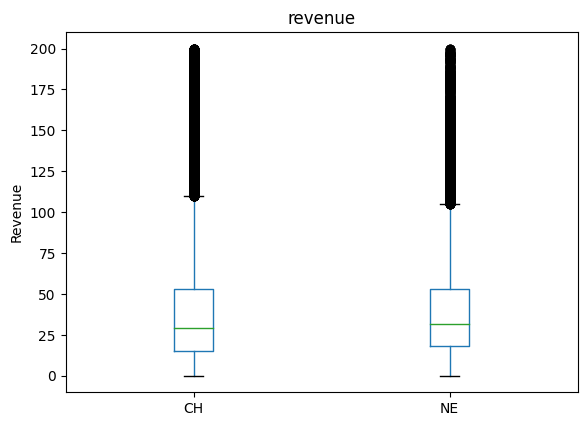

In [57]:
ax = merged_dataframe.boxplot(by='country_x', column='revenue', grid=False)
ax.set_xlabel('')
ax.set_ylabel('Revenue')
plt.suptitle('')

plt.show()

In [58]:
revenue_by_date = merged_dataframe.groupby('date_x')['revenue'].sum().to_dict()

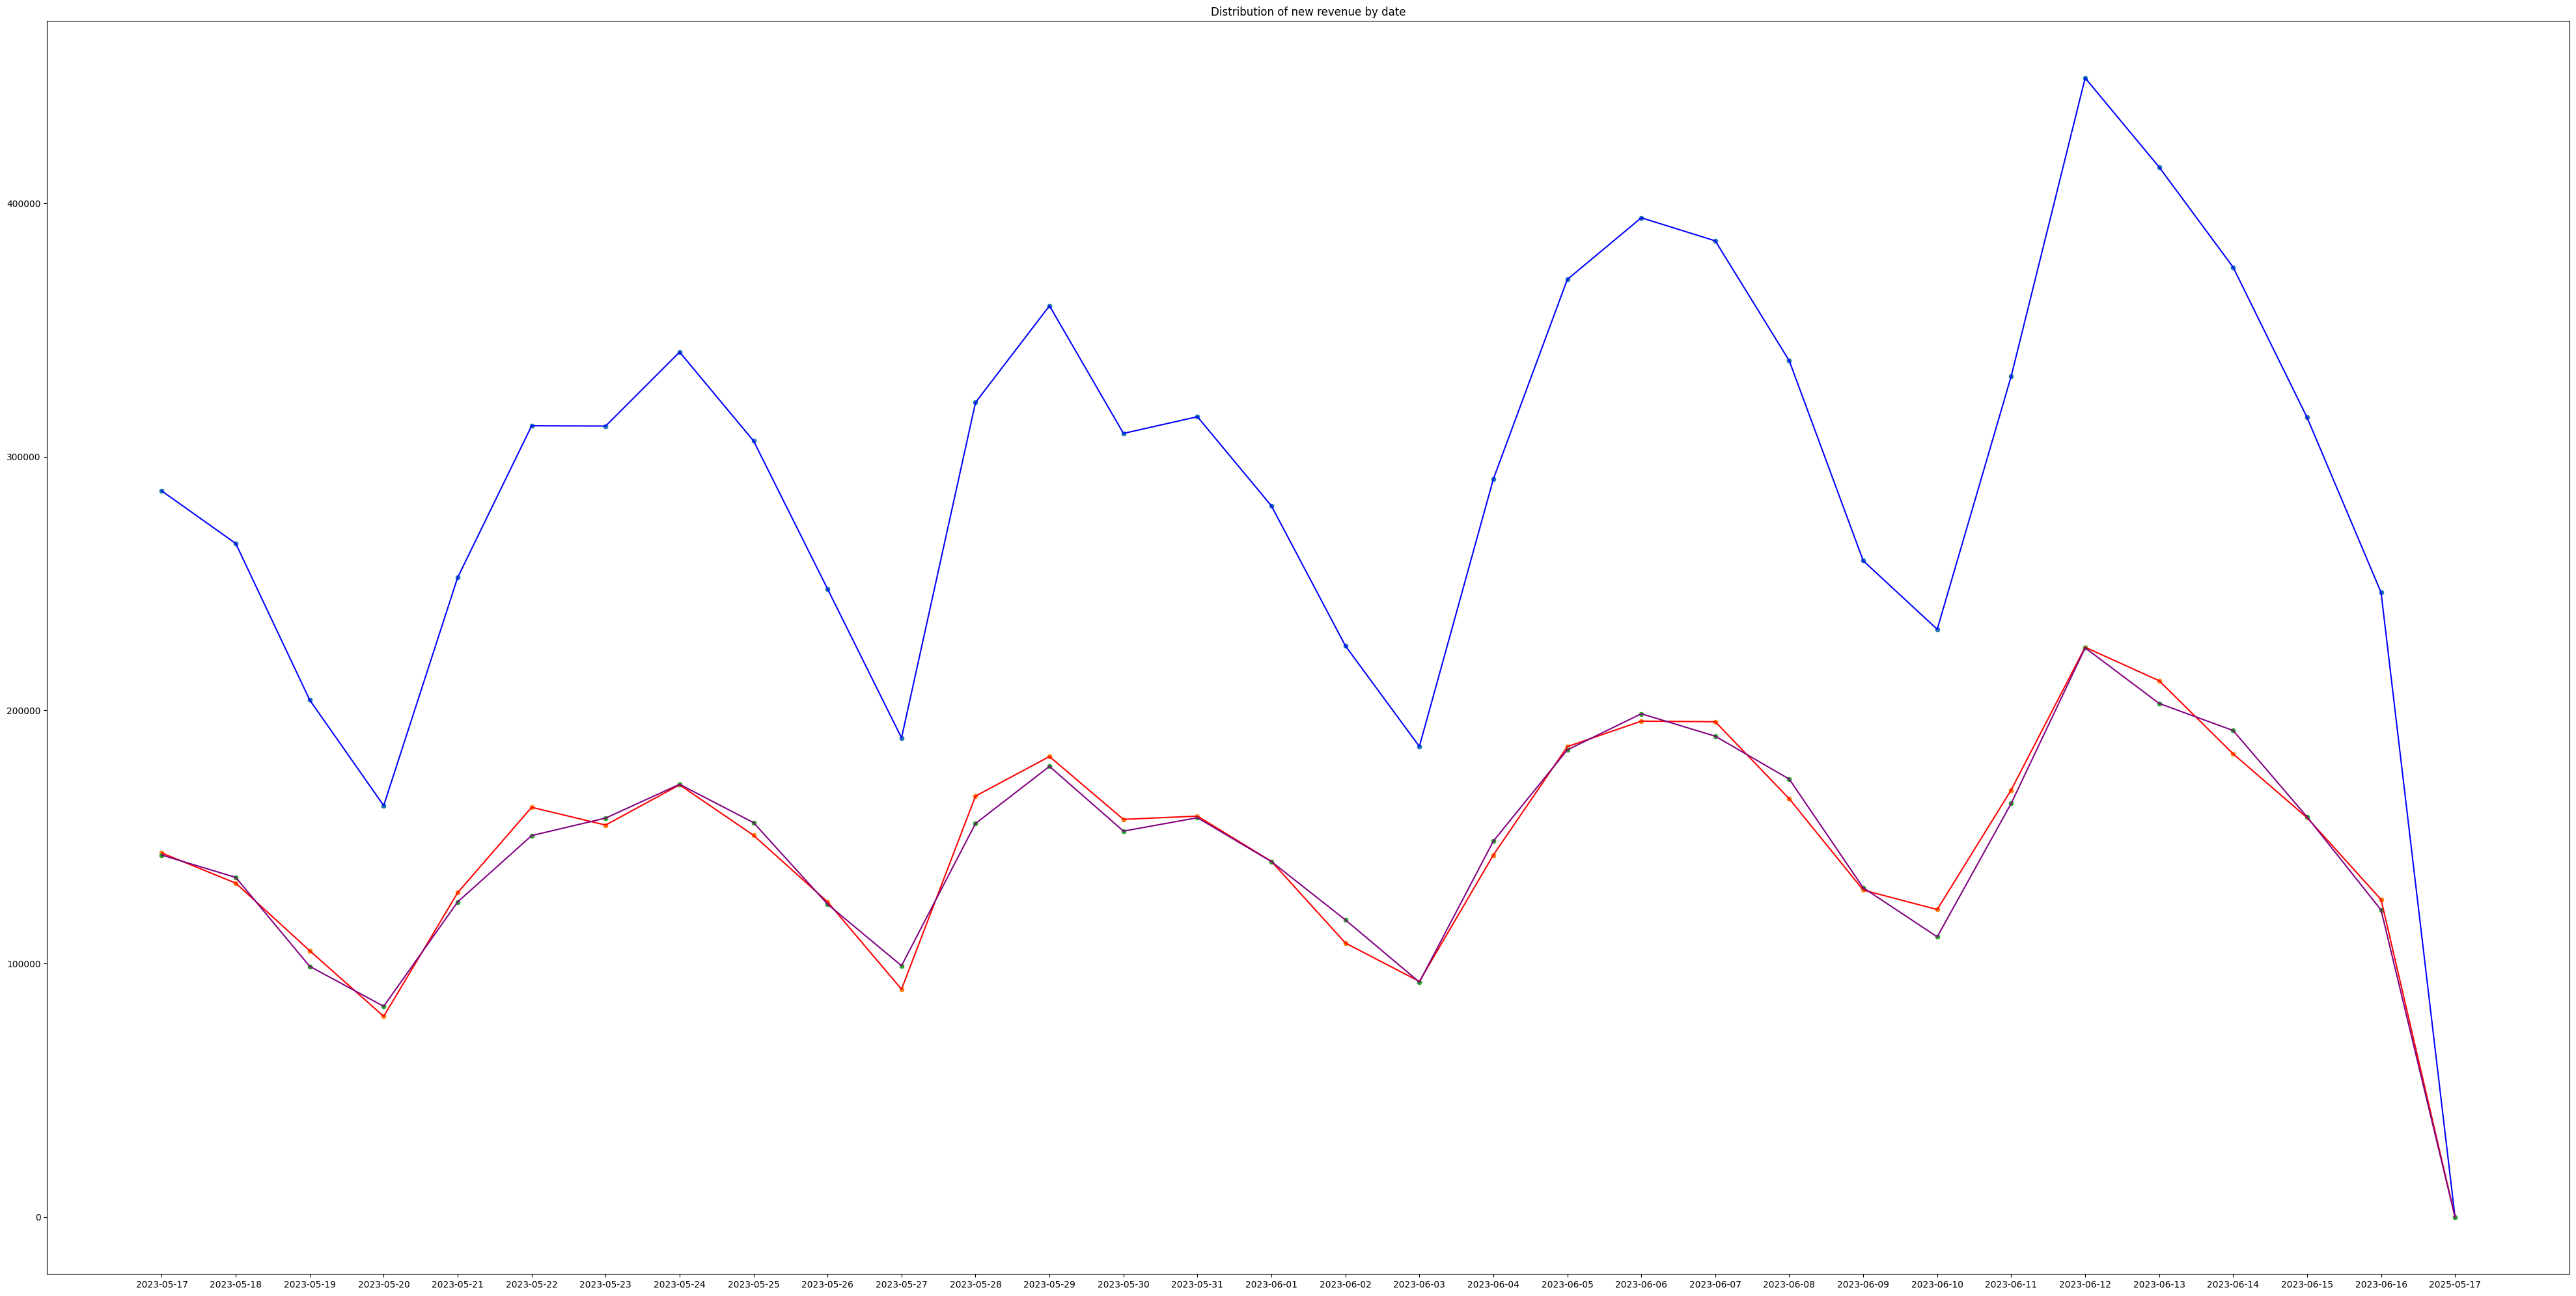

In [59]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(50, 25))

sns.scatterplot(x = revenue_by_date.keys(), y = revenue_by_date.values())

sns.lineplot(x=list(revenue_by_date.keys()), y=list(revenue_by_date.values()), ax=ax, color='blue')

merged_dataframe['revenue_1'] = merged_dataframe.loc[merged_dataframe['abUser'] == 1.0, 'revenue']
merged_dataframe['revenue_2'] = merged_dataframe.loc[merged_dataframe['abUser'] == 2.0, 'revenue']

revenue_by_date_1 = merged_dataframe.groupby('date_x')['revenue_1'].sum().to_dict()

sns.scatterplot(x = revenue_by_date_1.keys(), y = revenue_by_date_1.values())

sns.lineplot(x=list(revenue_by_date_1.keys()), y=list(revenue_by_date_1.values()), ax=ax, color='red')

revenue_by_date_2 = merged_dataframe.groupby('date_x')['revenue_2'].sum().to_dict()

sns.scatterplot(x = revenue_by_date_2.keys(), y = revenue_by_date_2.values())

sns.lineplot(x=list(revenue_by_date_2.keys()), y=list(revenue_by_date_2.values()), ax=ax, color='purple')

ax.set_title(f"Distribution of new revenue by date")

plt.show()

On Saturdays are the worst revenue. The best at the middle of week (Monday-Thuesday)

In [60]:
merged_dataframe['purchase'] = merged_dataframe['revenue'].notna()

In [61]:
# Sort the DataFrame by 'clientID' and 'sessionID'
merged_dataframe.sort_values(['clientID', 'sessionID'], inplace=True)

# Group by 'clientID'
grouped = merged_dataframe.groupby('clientID')

# Create a list to store the dictionaries
result_data = []

# Iterate through each group
for client_id, group in grouped:
    first_session_purchase = group.iloc[0]['purchase']
    further_session_purchase = any(group.iloc[1:]['purchase'])
    
    result_data.append({
        'clientID': client_id,
        'bought_first_visit': first_session_purchase,
        'bought_further_visits': further_session_purchase
    })

# Create the result DataFrame from the list of dictionaries
result_df = pd.DataFrame(result_data)

In [62]:
result_df['abTest'] = merged_dataframe.groupby('clientID')['abUser'].first().values

In [63]:
result_df.head(10)

,clientID,bought_first_visit,bought_further_visits,abTest
0,11111133f.4919x84,False,False,1.0
1,11111167a.4919x66,False,False,1.0
2,11111186.4919a494,False,False,1.0
3,111113a83.4917819,False,False,2.0
4,111113f88.49x14a8,False,False,2.0
5,111113x3.491afx3a,False,False,2.0
6,111116866.4919644,False,False,1.0
7,111116x7f.4919x6f,False,False,2.0
8,111117963.4919184,False,False,2.0
9,1111181.49177141,False,True,1.0


In [64]:
print('Percentege of clients who bought something during the first visit:', 
      len(result_df[result_df['bought_first_visit'] == True])/len(result_df['clientID']) * 100, '%')
print('Percentege of clients who bought something during the first visit:', 
      len(result_df[result_df['bought_first_visit'] == False])/len(result_df['clientID']) * 100, '%')

Percentege of clients who bought something during the first visit: 4.029287880322429 %
Percentege of clients who bought something during the first visit: 95.97071211967757 %


In [65]:
print('Percentege of clients from 1st group who bought something during the first visit:', 
      len(result_df[(result_df['bought_first_visit'] == True) & (result_df['abTest'] == 1.0)])
      /len(result_df['clientID']) * 100, 
        '%')
print('Percentege of clients from 2st group who bought something during the first visit:', 
      len(result_df[(result_df['bought_first_visit'] == True) & (result_df['abTest'] == 2.0)])
      /len(result_df['clientID']) * 100, 
        '%')

Percentege of clients from 1st group who bought something during the first visit: 2.0202838628704427 %
Percentege of clients from 2st group who bought something during the first visit: 2.009004017451986 %


In [66]:
print('Percentege of clients from 1st group who bought something during the further visits:',
    len(result_df[(result_df['bought_further_visits'] == True) & (result_df['abTest'] == 1.0)])
        /len(result_df['clientID']) * 100, '%')
print('Percentege of clients from 2st group who bought something during the further visits:',
    len(result_df[(result_df['bought_further_visits'] == True) & (result_df['abTest'] == 2.0)])
        /len(result_df['clientID']) * 100, '%')

Percentege of clients from 1st group who bought something during the further visits: 2.4012169523366955 %
Percentege of clients from 2st group who bought something during the further visits: 2.4128542576451735 %


In [67]:
print("Percentege of clients who didn't buy anything", 
     len(result_df[(result_df['bought_first_visit'] == False)&(result_df['bought_further_visits'] == False)])*100
      /len(result_df['clientID']), '%')

Percentege of clients who didn't buy anything 91.3805696719114 %


In [68]:
merged_dataframe[merged_dataframe['clientID']=='111117963.4919184']

,date_x,country_x,sessionID,clientID,isNew,abUser,orderNumber,quantity,revenue,revenue_1,revenue_2,purchase
4961679,2023-06-15,NE,4919186879667.19fnuva,111117963.4919184,1.0,2.0,NaN,NaN,NaN,NaN,NaN,False


# Conclusion

Upon thorough examination, I conclude that there is no discernible difference between the 1st and 2nd models. To enhance the evaluation, I intend to conduct a more in-depth analysis by assessing the assignment logic of 'clientID' and 'sessionID'. However, I remain skeptical about the potential for improved results from this approach..


1. Is the ratio of users in the reco group and users in the test group really 50:50? Can you test it by an appropriate statistical test? Do you prefer to test it on a daily basis, or to run one test for the whole period? If you run multiple tests, do you need all of them to have positive results to verify the 50:50 distribution hypothesis?

During the exploration, a significant gap in user assignment to groups wasn't found. It is not exactly 50:50, though very close to this; I would say it is not necessary to address.

I prefer to conduct the test weekly, as I believe it will yield relevant results. To provide multiple tests at once, we can use the "Multi-Arm Bandit Algorithm." In this case, we can check results in real-time and adjust the proportion of users assigned to groups accordingly.

2. What about the users with an unassigned group? Bambino thinks the test is fine if their share is below 0.5%.

Users who weren't assigned to one of the groups were simply deleted; the gap is slightly higher than the required 0.5%.

3. Do you find any other problems related to a group assignment in the data?

No, I didn't identify any other issues.

4. What about the orders that are not in GA data? What is their share? How do you propose to handle them?

There is a discrepancy of 7% between the two tables. It is significant and needs to be addressed, although I'm unsure about the solution. However, I believe it won't have a substantial impact on the final results because we still have 93% of the data to evaluate our test.

5. Does the “reco group” earn, on average, a greater revenue? Does it have larger orders? Propose appropriate metrics and visualize them. Is there any other metric you may wish to evaluate?

During the exploration, no significant difference in revenue or the number of ordered items between users in the two groups was found.

6. Do you observe any differences between both countries?

Yes, users from Chile spent on average (both in mean and median) less money than users from NE. However, Chilean users ordered more items in a single purchase than users from NE.